#**Import Libraries**

In [ ]:
from google.colab import drive4
drive.mount('/content/drive')

In [ ]:
%cd 'drive/MyDrive/ERA_V1/Session_8_Batch_Normalization_And_Regularization/'

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import warnings
warnings.filterwarnings("ignore")
!pip install summary
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Data Download and Transforms**

In [ ]:
from utils import Transforms
transforms_obj = Transforms()
train = transforms_obj.download_train_data()
test = transforms_obj.download_test_data()

Files already downloaded and verified


#**Data Loaders**

In [ ]:
from utils import TrainTestDataloaders
train_test_dataloaders = TrainTestDataloaders()
train_loader = train_test_dataloaders.get_train_dataloader(train)
test_loader = train_test_dataloaders.get_train_dataloader(test)

#**Showing some sample images**

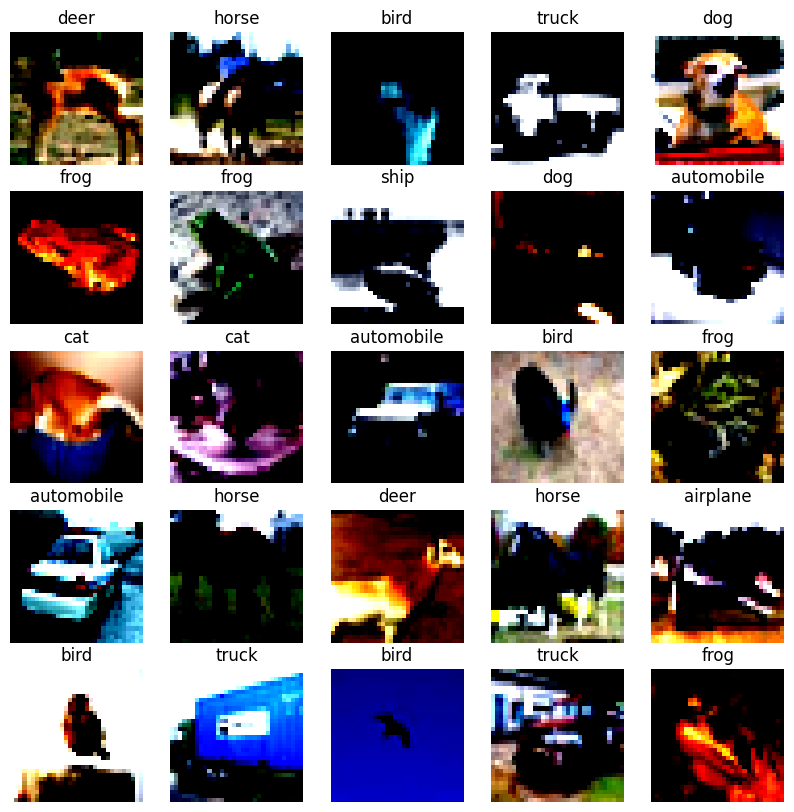

In [ ]:
import warnings
from utils import SampleData
warnings.filterwarnings("ignore")
sample_data = SampleData()
sample_data.show_sample_images(train_loader, train.classes)

#**BATCH NORMALISATION**

###**Model**

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [ ]:
from models import ModelBN
model = ModelBN().to(device)
summary(model, input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 34, 34]           1,024
             ReLU-10           [-1, 32, 34, 34]               0
      BatchNorm2d-11           [-1, 32, 34, 34]              64
          Dropout-12           [-1, 32, 34, 34]               0
        MaxPool2d-13           [-1, 32, 17, 17]               0
           Conv2d-14           [-1, 32,

###**Train and Test Model**

In [ ]:
from train_test_models import Train_Test_With_LR_Scheduler
train_test_obj = Train_Test_With_LR_Scheduler()
train_losses, test_losses, train_acc, test_acc = train_test_obj.train_and_test_model(model, device, 20, train_loader, test_loader)

EPOCH: 0


loss=4.3268842697143555 Batch_id=390 Accuracy=9.70: 100%|██████████| 391/391 [00:20<00:00, 18.83it/s]



 Test set: Average loss: 4.2315, Accuracy: 1017/10000 (10.17%)

EPOCH: 1


loss=4.260463714599609 Batch_id=390 Accuracy=11.66: 100%|██████████| 391/391 [00:22<00:00, 17.51it/s]



 Test set: Average loss: 4.1744, Accuracy: 1325/10000 (13.25%)

EPOCH: 2


loss=4.131499290466309 Batch_id=390 Accuracy=13.74: 100%|██████████| 391/391 [00:20<00:00, 19.26it/s]



 Test set: Average loss: 4.1447, Accuracy: 1671/10000 (16.71%)

EPOCH: 3


loss=4.1195197105407715 Batch_id=390 Accuracy=15.04: 100%|██████████| 391/391 [00:21<00:00, 18.34it/s]



 Test set: Average loss: 4.1319, Accuracy: 1691/10000 (16.91%)

EPOCH: 4


loss=4.3768205642700195 Batch_id=390 Accuracy=15.77: 100%|██████████| 391/391 [00:22<00:00, 17.59it/s]



 Test set: Average loss: 4.1085, Accuracy: 1674/10000 (16.74%)

EPOCH: 5


loss=4.046165943145752 Batch_id=390 Accuracy=16.46: 100%|██████████| 391/391 [00:21<00:00, 18.38it/s]



 Test set: Average loss: 4.1034, Accuracy: 1834/10000 (18.34%)

EPOCH: 6


loss=3.977571964263916 Batch_id=390 Accuracy=16.98: 100%|██████████| 391/391 [00:21<00:00, 18.60it/s]



 Test set: Average loss: 4.0827, Accuracy: 1784/10000 (17.84%)

EPOCH: 7


loss=3.9754154682159424 Batch_id=390 Accuracy=17.18: 100%|██████████| 391/391 [00:22<00:00, 17.47it/s]



 Test set: Average loss: 4.0805, Accuracy: 1803/10000 (18.03%)

EPOCH: 8


loss=4.245484828948975 Batch_id=390 Accuracy=17.39: 100%|██████████| 391/391 [00:20<00:00, 18.73it/s]



 Test set: Average loss: 4.0768, Accuracy: 1794/10000 (17.94%)

EPOCH: 9


loss=4.010044097900391 Batch_id=390 Accuracy=17.52: 100%|██████████| 391/391 [00:21<00:00, 17.86it/s]



 Test set: Average loss: 4.0788, Accuracy: 1809/10000 (18.09%)

EPOCH: 10


loss=3.982652187347412 Batch_id=390 Accuracy=17.55: 100%|██████████| 391/391 [00:21<00:00, 18.34it/s]



 Test set: Average loss: 4.0755, Accuracy: 1817/10000 (18.17%)

EPOCH: 11


loss=3.9265854358673096 Batch_id=390 Accuracy=17.60: 100%|██████████| 391/391 [00:21<00:00, 18.19it/s]



 Test set: Average loss: 4.0774, Accuracy: 1839/10000 (18.39%)

EPOCH: 12


loss=4.111081600189209 Batch_id=390 Accuracy=17.67: 100%|██████████| 391/391 [00:21<00:00, 18.08it/s]



 Test set: Average loss: 4.0748, Accuracy: 1831/10000 (18.31%)

EPOCH: 13


loss=3.8273983001708984 Batch_id=390 Accuracy=17.69: 100%|██████████| 391/391 [00:20<00:00, 18.89it/s]



 Test set: Average loss: 4.0753, Accuracy: 1840/10000 (18.40%)

EPOCH: 14


loss=4.047910213470459 Batch_id=390 Accuracy=17.66: 100%|██████████| 391/391 [00:20<00:00, 19.28it/s]



 Test set: Average loss: 4.0762, Accuracy: 1839/10000 (18.39%)

EPOCH: 15


loss=4.169897556304932 Batch_id=390 Accuracy=17.75: 100%|██████████| 391/391 [00:20<00:00, 19.35it/s]



 Test set: Average loss: 4.0746, Accuracy: 1838/10000 (18.38%)

EPOCH: 16


loss=3.7530200481414795 Batch_id=390 Accuracy=17.77: 100%|██████████| 391/391 [00:21<00:00, 18.42it/s]



 Test set: Average loss: 4.0754, Accuracy: 1843/10000 (18.43%)

EPOCH: 17


loss=3.9742190837860107 Batch_id=390 Accuracy=17.71: 100%|██████████| 391/391 [00:22<00:00, 17.36it/s]



 Test set: Average loss: 4.0754, Accuracy: 1844/10000 (18.44%)

EPOCH: 18


loss=3.8829753398895264 Batch_id=390 Accuracy=17.77: 100%|██████████| 391/391 [00:25<00:00, 15.20it/s]



 Test set: Average loss: 4.0751, Accuracy: 1844/10000 (18.44%)

EPOCH: 19


loss=3.9085869789123535 Batch_id=390 Accuracy=17.77: 100%|██████████| 391/391 [00:26<00:00, 14.56it/s]



 Test set: Average loss: 4.0748, Accuracy: 1841/10000 (18.41%)



###**Visualise train and test performance**

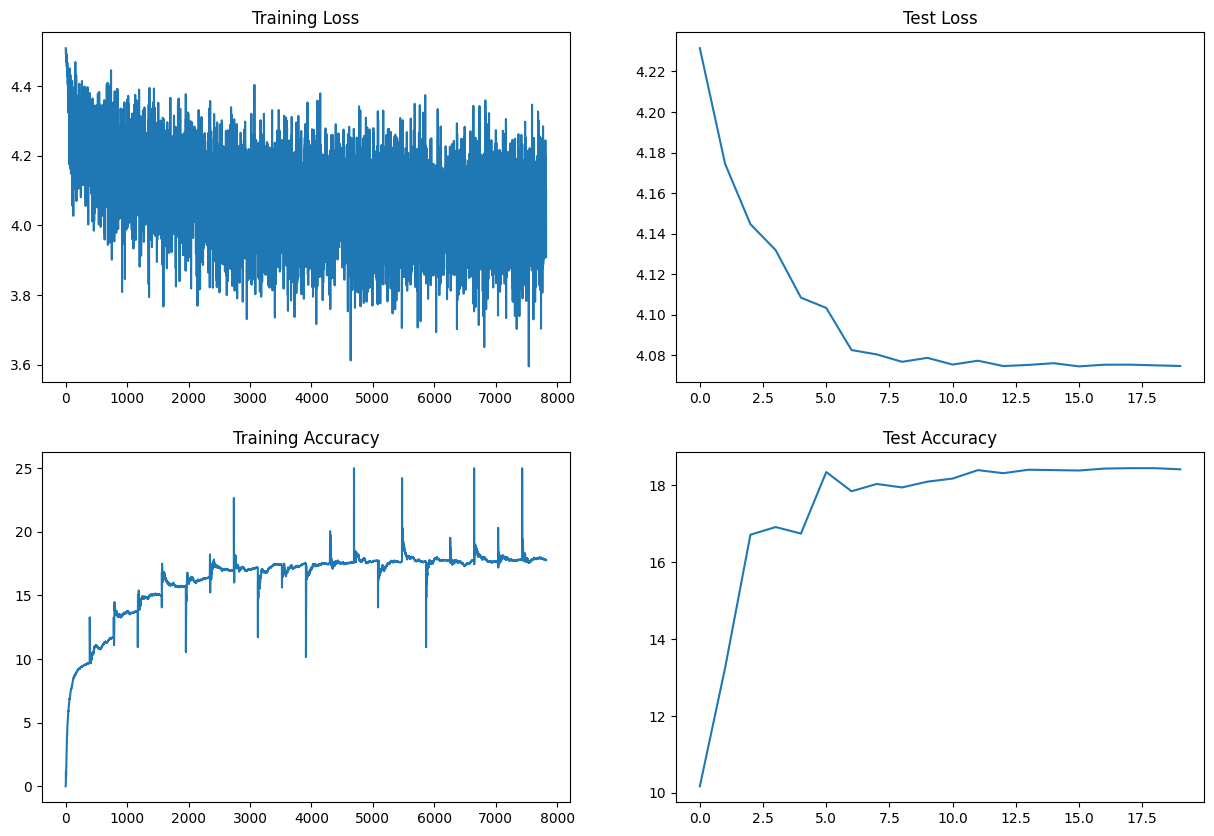

In [ ]:
from train_test_models import *
result_visualisation_obj = ResultVisualisation()
result_visualisation_obj.plot_accuracy_and_loss(train_losses, test_losses, train_acc, test_acc)

###**Showing some misclassified Images**

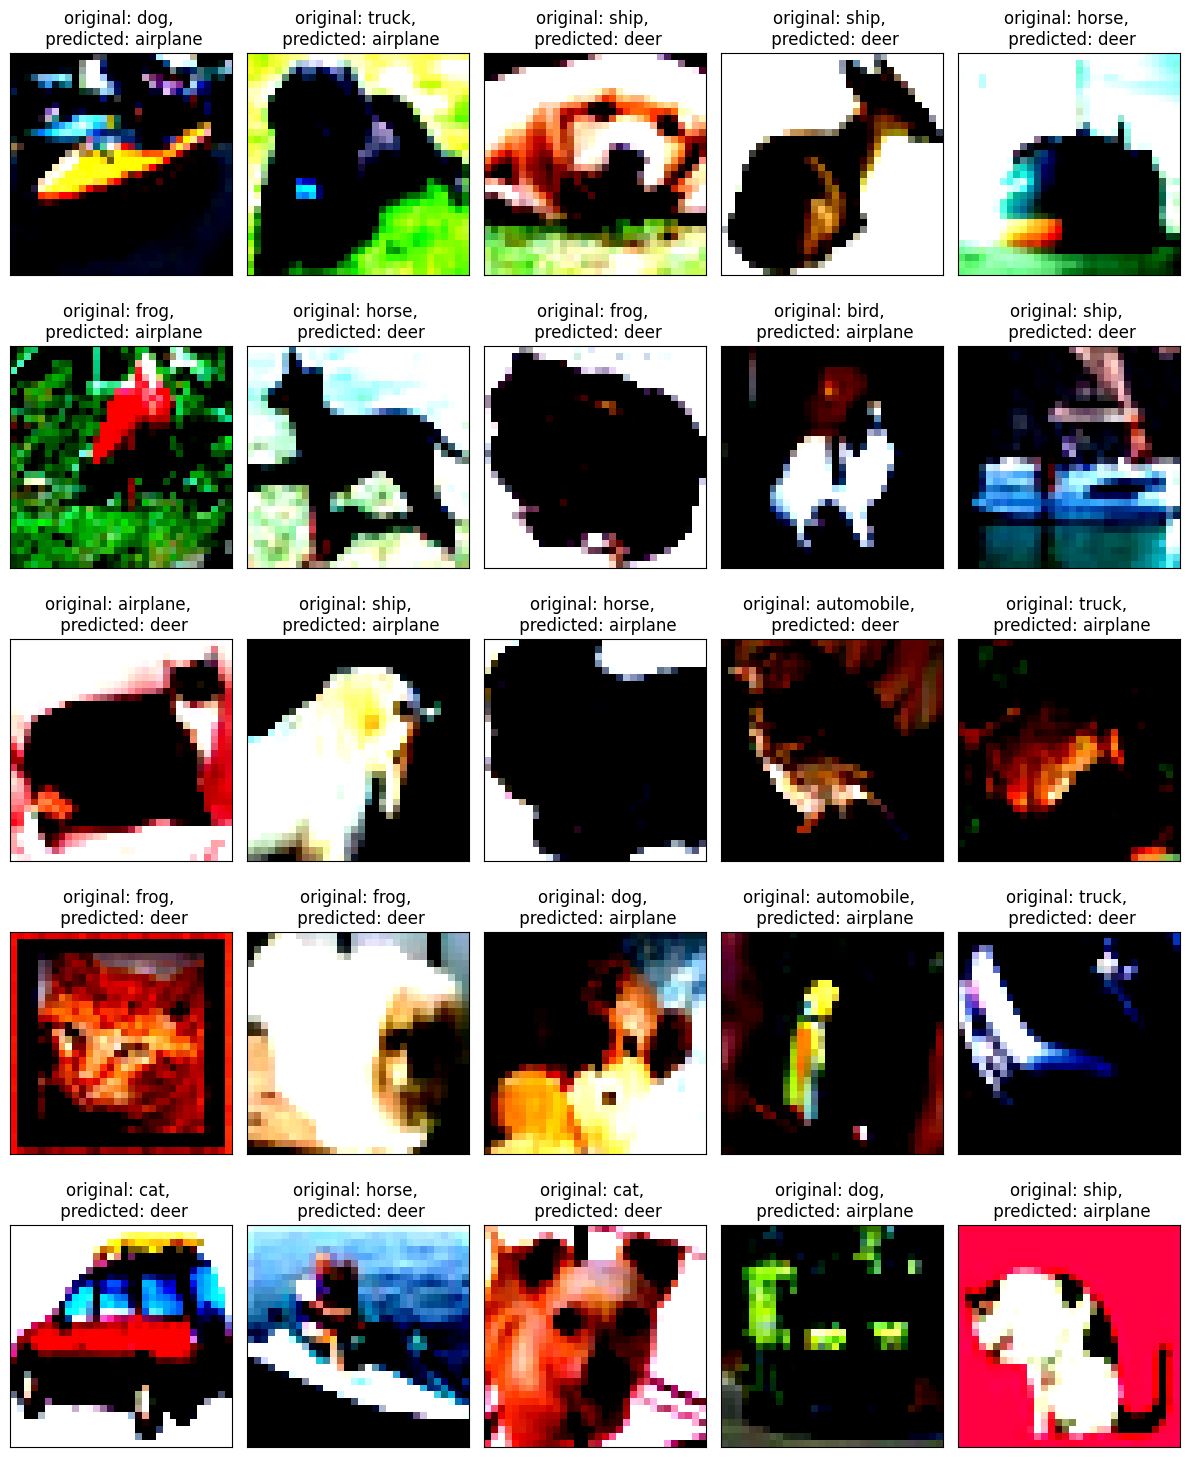

In [ ]:
from utis import SampleData
sample_data = SampleData()
sample_data.show_misclassified_images(train_test_obj.misclassified_images, train_test_obj.original_labels, train_test_obj.predicted_labels, train.classes)

#**LAYER NORMALISATION**

### **Model**

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [ ]:
from models import LayerNorm, ModelLN
model = ModelLN().to(device)
summary(model, input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
         LayerNorm-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
         LayerNorm-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 34, 34]           1,024
             ReLU-10           [-1, 32, 34, 34]               0
        LayerNorm-11           [-1, 32, 34, 34]               0
          Dropout-12           [-1, 32, 34, 34]               0
        MaxPool2d-13           [-1, 32, 17, 17]               0
           Conv2d-14           [-1, 32,

###**Train and Test Model**

In [ ]:
from train_test_models import Train_Test_With_LR_Scheduler
train_test_obj = Train_Test_With_LR_Scheduler()
train_losses, test_losses, train_acc, test_acc = train_test_obj.train_and_test_model(model, device, 20, train_loader, test_loader)

EPOCH: 0


loss=4.372093677520752 Batch_id=390 Accuracy=8.27: 100%|██████████| 391/391 [00:20<00:00, 19.49it/s]



 Test set: Average loss: 4.3138, Accuracy: 903/10000 (9.03%)

EPOCH: 1


loss=4.419262886047363 Batch_id=390 Accuracy=9.62: 100%|██████████| 391/391 [00:23<00:00, 16.40it/s]



 Test set: Average loss: 4.2850, Accuracy: 1050/10000 (10.50%)

EPOCH: 2


loss=4.231014728546143 Batch_id=390 Accuracy=11.17: 100%|██████████| 391/391 [00:19<00:00, 19.57it/s]



 Test set: Average loss: 4.2684, Accuracy: 1195/10000 (11.95%)

EPOCH: 3


loss=4.318347454071045 Batch_id=390 Accuracy=12.20: 100%|██████████| 391/391 [00:18<00:00, 20.62it/s]



 Test set: Average loss: 4.2468, Accuracy: 1283/10000 (12.83%)

EPOCH: 4


loss=4.272758483886719 Batch_id=390 Accuracy=13.14: 100%|██████████| 391/391 [00:20<00:00, 19.27it/s]



 Test set: Average loss: 4.2422, Accuracy: 1292/10000 (12.92%)

EPOCH: 5


loss=4.333155632019043 Batch_id=390 Accuracy=13.51: 100%|██████████| 391/391 [00:20<00:00, 19.40it/s]



 Test set: Average loss: 4.2272, Accuracy: 1355/10000 (13.55%)

EPOCH: 6


loss=4.082058906555176 Batch_id=390 Accuracy=13.98: 100%|██████████| 391/391 [00:20<00:00, 18.74it/s]



 Test set: Average loss: 4.2130, Accuracy: 1401/10000 (14.01%)

EPOCH: 7


loss=4.1754679679870605 Batch_id=390 Accuracy=14.12: 100%|██████████| 391/391 [00:19<00:00, 19.87it/s]



 Test set: Average loss: 4.2119, Accuracy: 1364/10000 (13.64%)

EPOCH: 8


loss=4.125699043273926 Batch_id=390 Accuracy=14.24: 100%|██████████| 391/391 [00:19<00:00, 20.52it/s]



 Test set: Average loss: 4.2058, Accuracy: 1428/10000 (14.28%)

EPOCH: 9


loss=4.040921211242676 Batch_id=390 Accuracy=14.29: 100%|██████████| 391/391 [00:19<00:00, 19.83it/s]



 Test set: Average loss: 4.2070, Accuracy: 1421/10000 (14.21%)

EPOCH: 10


loss=4.300401210784912 Batch_id=390 Accuracy=14.60: 100%|██████████| 391/391 [00:20<00:00, 19.51it/s]



 Test set: Average loss: 4.2018, Accuracy: 1435/10000 (14.35%)

EPOCH: 11


loss=4.004945278167725 Batch_id=390 Accuracy=14.70: 100%|██████████| 391/391 [00:19<00:00, 19.84it/s]



 Test set: Average loss: 4.2013, Accuracy: 1469/10000 (14.69%)

EPOCH: 12


loss=4.204770088195801 Batch_id=390 Accuracy=14.77: 100%|██████████| 391/391 [00:19<00:00, 20.38it/s]



 Test set: Average loss: 4.1997, Accuracy: 1443/10000 (14.43%)

EPOCH: 13


loss=4.024279594421387 Batch_id=390 Accuracy=14.68: 100%|██████████| 391/391 [00:19<00:00, 20.20it/s]



 Test set: Average loss: 4.2009, Accuracy: 1438/10000 (14.38%)

EPOCH: 14


loss=4.216385841369629 Batch_id=390 Accuracy=14.69: 100%|██████████| 391/391 [00:20<00:00, 19.25it/s]



 Test set: Average loss: 4.1988, Accuracy: 1465/10000 (14.65%)

EPOCH: 15


loss=4.13281774520874 Batch_id=390 Accuracy=14.69: 100%|██████████| 391/391 [00:19<00:00, 20.10it/s]



 Test set: Average loss: 4.1986, Accuracy: 1464/10000 (14.64%)

EPOCH: 16


loss=4.2999749183654785 Batch_id=390 Accuracy=14.81: 100%|██████████| 391/391 [00:19<00:00, 20.52it/s]



 Test set: Average loss: 4.1988, Accuracy: 1457/10000 (14.57%)

EPOCH: 17


loss=3.952284574508667 Batch_id=390 Accuracy=14.72: 100%|██████████| 391/391 [00:20<00:00, 19.06it/s]



 Test set: Average loss: 4.1988, Accuracy: 1456/10000 (14.56%)

EPOCH: 18


loss=4.201645851135254 Batch_id=390 Accuracy=14.79: 100%|██████████| 391/391 [00:20<00:00, 19.27it/s]



 Test set: Average loss: 4.2004, Accuracy: 1483/10000 (14.83%)

EPOCH: 19


loss=3.994473695755005 Batch_id=390 Accuracy=14.76: 100%|██████████| 391/391 [00:19<00:00, 19.67it/s]



 Test set: Average loss: 4.1984, Accuracy: 1468/10000 (14.68%)



###**Visualise train and test performance**

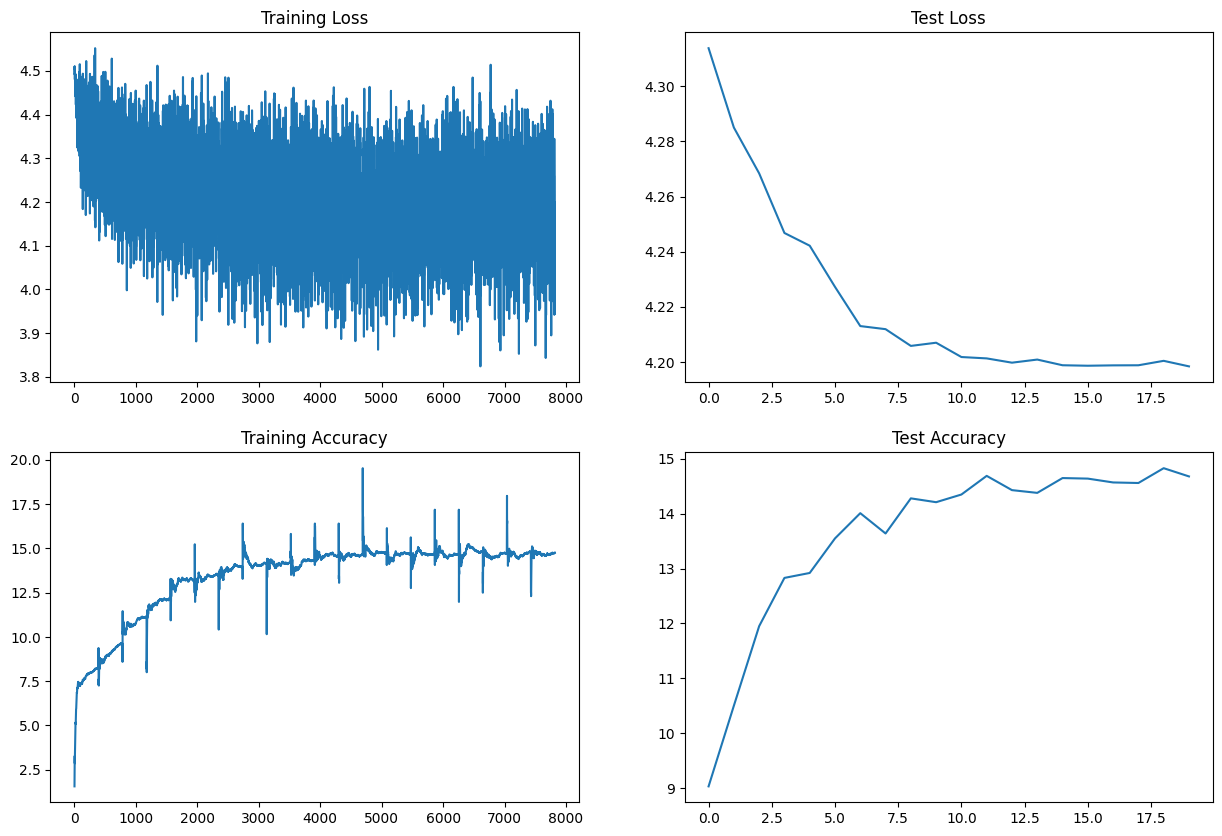

In [ ]:
from train_test_models import ResultVisualisation
result_visualisation_obj = ResultVisualisation()
result_visualisation_obj.plot_accuracy_and_loss(train_losses, test_losses, train_acc, test_acc)

###**Showing some misclassified Images**

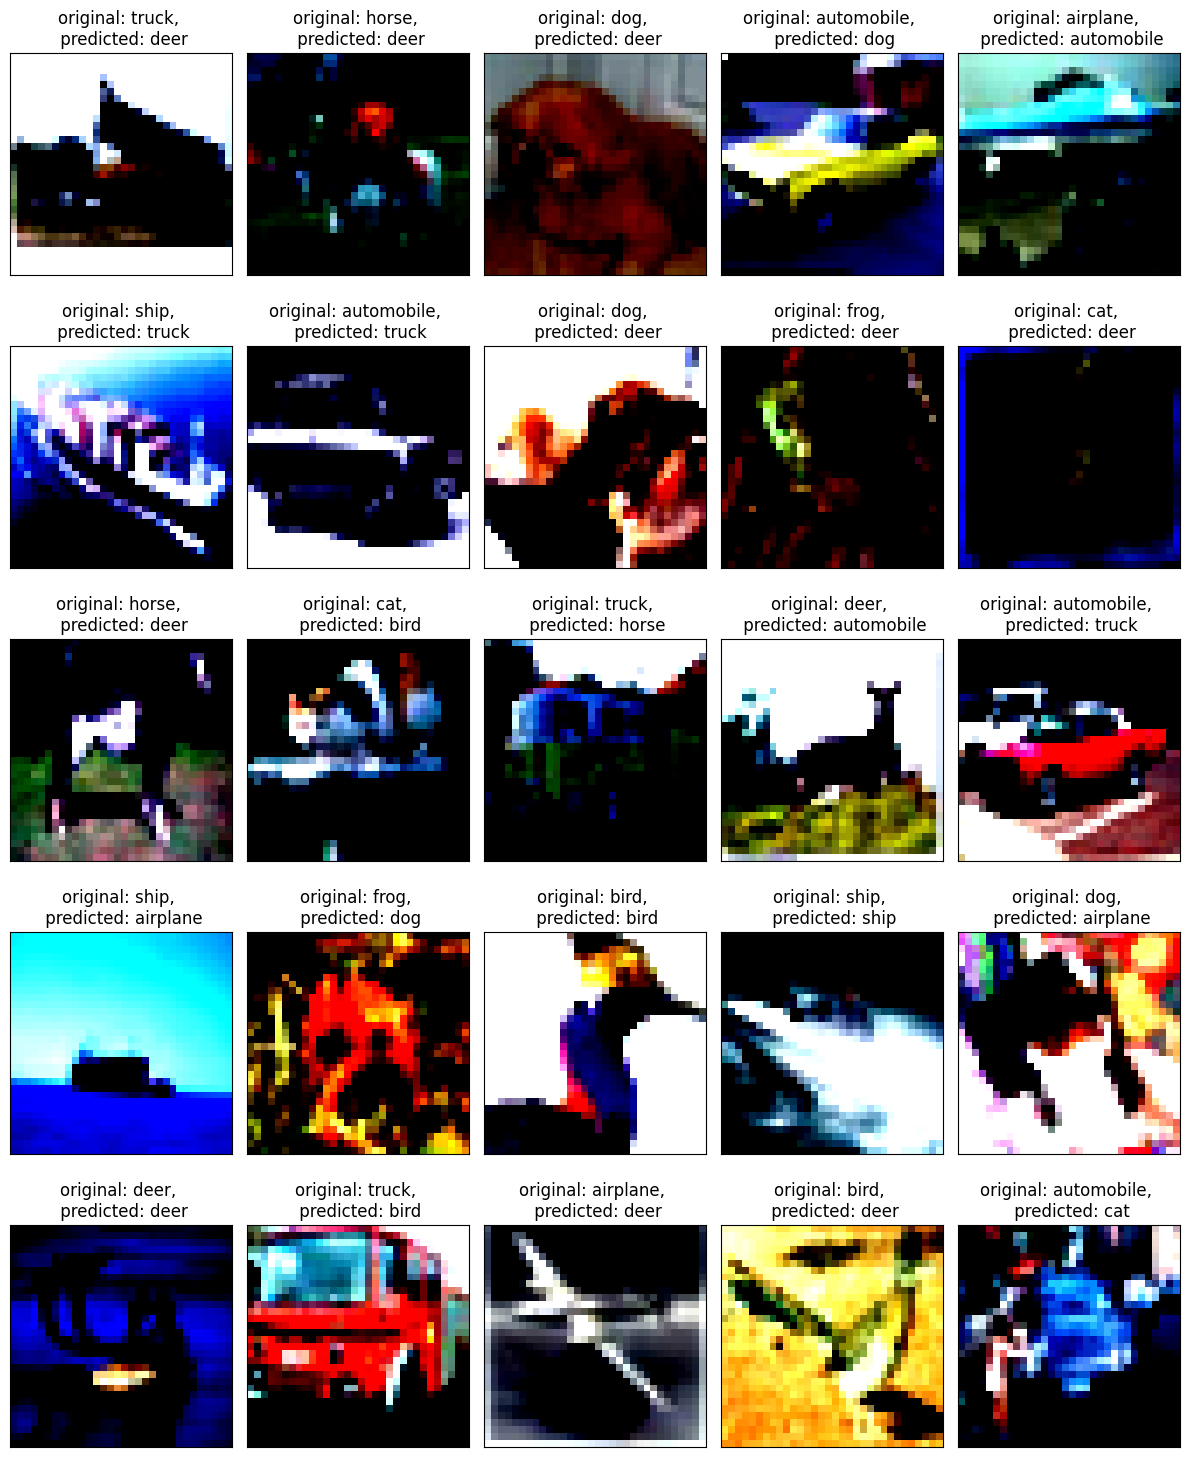

In [ ]:
from utils import SampleData
sample_data = SampleData()
sample_data.show_misclassified_images(train_test_obj.misclassified_images, train_test_obj.original_labels, train_test_obj.predicted_labels, train.classes)

#**GROUP NORMALISATION**

###**Model**

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [ ]:
from model import ModelGN
model = ModelGN().to(device)
summary(model, input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
         GroupNorm-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
         GroupNorm-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 34, 34]           1,024
             ReLU-10           [-1, 32, 34, 34]               0
        GroupNorm-11           [-1, 32, 34, 34]              64
          Dropout-12           [-1, 32, 34, 34]               0
        MaxPool2d-13           [-1, 32, 17, 17]               0
           Conv2d-14           [-1, 32,

###**Train and Test Model**

In [ ]:
from train_test_models import Train_Test_With_LR_Scheduler
train_test_obj = Train_Test_With_LR_Scheduler()
train_losses, test_losses, train_acc, test_acc = train_test_obj.train_and_test_model(model, device, 20, train_loader, test_loader)

EPOCH: 0


loss=4.301774024963379 Batch_id=390 Accuracy=9.97: 100%|██████████| 391/391 [00:23<00:00, 16.87it/s]



 Test set: Average loss: 4.2143, Accuracy: 1014/10000 (10.14%)

EPOCH: 1


loss=4.262444972991943 Batch_id=390 Accuracy=10.59: 100%|██████████| 391/391 [00:21<00:00, 18.56it/s]



 Test set: Average loss: 4.1944, Accuracy: 1205/10000 (12.05%)

EPOCH: 2


loss=4.1319990158081055 Batch_id=390 Accuracy=12.44: 100%|██████████| 391/391 [00:19<00:00, 20.26it/s]



 Test set: Average loss: 4.1683, Accuracy: 1400/10000 (14.00%)

EPOCH: 3


loss=4.247109413146973 Batch_id=390 Accuracy=13.88: 100%|██████████| 391/391 [00:18<00:00, 20.79it/s]



 Test set: Average loss: 4.1414, Accuracy: 1505/10000 (15.05%)

EPOCH: 4


loss=4.262640953063965 Batch_id=390 Accuracy=14.83: 100%|██████████| 391/391 [00:19<00:00, 20.39it/s]



 Test set: Average loss: 4.1159, Accuracy: 1633/10000 (16.33%)

EPOCH: 5


loss=4.14510440826416 Batch_id=390 Accuracy=15.68: 100%|██████████| 391/391 [00:18<00:00, 20.95it/s]



 Test set: Average loss: 4.1102, Accuracy: 1671/10000 (16.71%)

EPOCH: 6


loss=4.158709526062012 Batch_id=390 Accuracy=16.64: 100%|██████████| 391/391 [00:18<00:00, 21.02it/s]



 Test set: Average loss: 4.1025, Accuracy: 1832/10000 (18.32%)

EPOCH: 7


loss=4.13333797454834 Batch_id=390 Accuracy=16.87: 100%|██████████| 391/391 [00:19<00:00, 19.79it/s]



 Test set: Average loss: 4.0929, Accuracy: 1817/10000 (18.17%)

EPOCH: 8


loss=4.106945037841797 Batch_id=390 Accuracy=16.93: 100%|██████████| 391/391 [00:18<00:00, 21.47it/s]



 Test set: Average loss: 4.0996, Accuracy: 1852/10000 (18.52%)

EPOCH: 9


loss=4.137502670288086 Batch_id=390 Accuracy=17.14: 100%|██████████| 391/391 [00:18<00:00, 21.64it/s]



 Test set: Average loss: 4.0928, Accuracy: 1845/10000 (18.45%)

EPOCH: 10


loss=4.079633712768555 Batch_id=390 Accuracy=17.13: 100%|██████████| 391/391 [00:19<00:00, 20.23it/s]



 Test set: Average loss: 4.0915, Accuracy: 1831/10000 (18.31%)

EPOCH: 11


loss=4.026396751403809 Batch_id=390 Accuracy=17.25: 100%|██████████| 391/391 [00:18<00:00, 21.68it/s]



 Test set: Average loss: 4.0967, Accuracy: 1834/10000 (18.34%)

EPOCH: 12


loss=4.1111249923706055 Batch_id=390 Accuracy=17.28: 100%|██████████| 391/391 [00:19<00:00, 20.20it/s]



 Test set: Average loss: 4.0978, Accuracy: 1851/10000 (18.51%)

EPOCH: 13


loss=4.230372428894043 Batch_id=390 Accuracy=17.44: 100%|██████████| 391/391 [00:19<00:00, 20.22it/s]



 Test set: Average loss: 4.0944, Accuracy: 1849/10000 (18.49%)

EPOCH: 14


loss=4.129790782928467 Batch_id=390 Accuracy=17.37: 100%|██████████| 391/391 [00:18<00:00, 21.23it/s]



 Test set: Average loss: 4.0919, Accuracy: 1854/10000 (18.54%)

EPOCH: 15


loss=3.966679334640503 Batch_id=390 Accuracy=17.42: 100%|██████████| 391/391 [00:18<00:00, 21.71it/s]



 Test set: Average loss: 4.0947, Accuracy: 1851/10000 (18.51%)

EPOCH: 16


loss=4.311443328857422 Batch_id=390 Accuracy=17.41: 100%|██████████| 391/391 [00:19<00:00, 20.19it/s]



 Test set: Average loss: 4.0937, Accuracy: 1852/10000 (18.52%)

EPOCH: 17


loss=3.9050610065460205 Batch_id=390 Accuracy=17.43: 100%|██████████| 391/391 [00:18<00:00, 21.51it/s]



 Test set: Average loss: 4.0946, Accuracy: 1850/10000 (18.50%)

EPOCH: 18


loss=4.228440284729004 Batch_id=390 Accuracy=17.44: 100%|██████████| 391/391 [00:18<00:00, 21.21it/s]



 Test set: Average loss: 4.0944, Accuracy: 1850/10000 (18.50%)

EPOCH: 19


loss=4.179853439331055 Batch_id=390 Accuracy=17.38: 100%|██████████| 391/391 [00:19<00:00, 20.04it/s]



 Test set: Average loss: 4.0941, Accuracy: 1850/10000 (18.50%)



###**Visualise train and test performance**

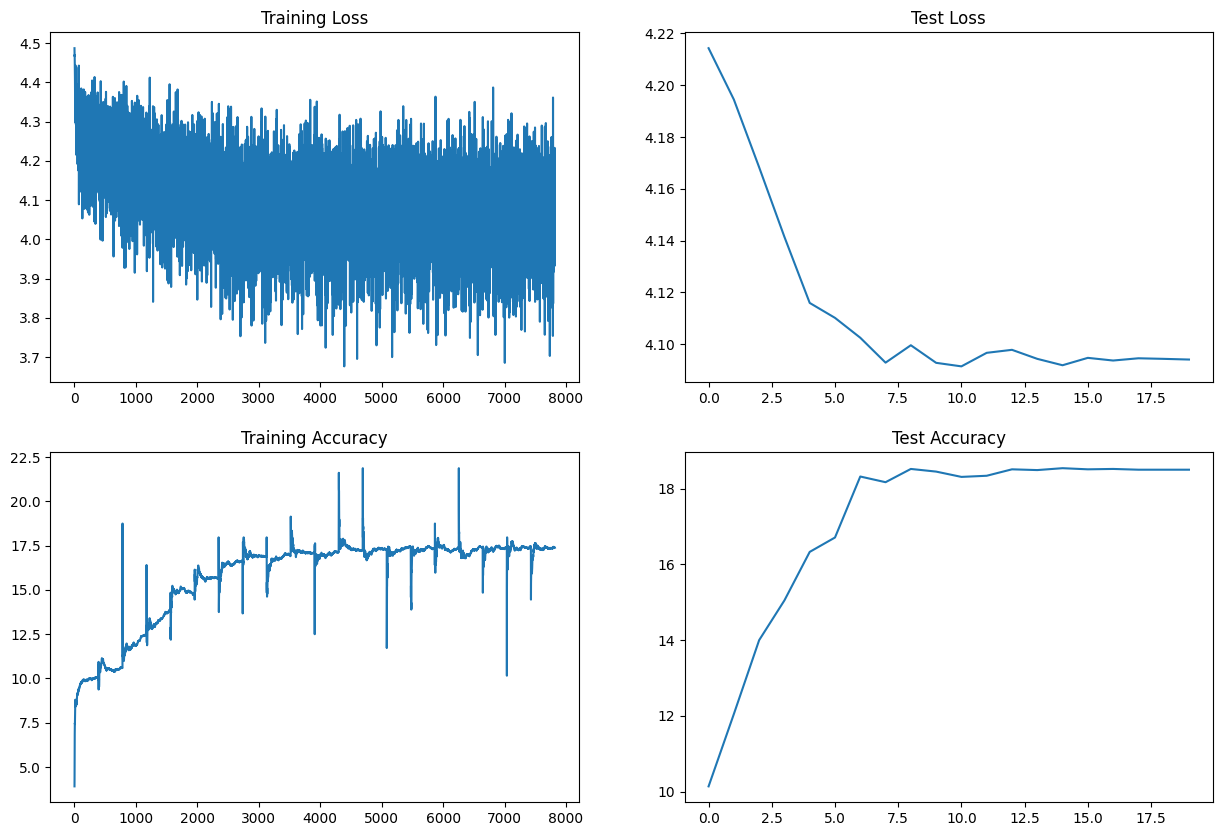

In [ ]:
from train_test_models import ResultVisualisation
result_visualisation_obj = ResultVisualisation()
result_visualisation_obj.plot_accuracy_and_loss(train_losses, test_losses, train_acc, test_acc)

###**Showing some misclassified Images**


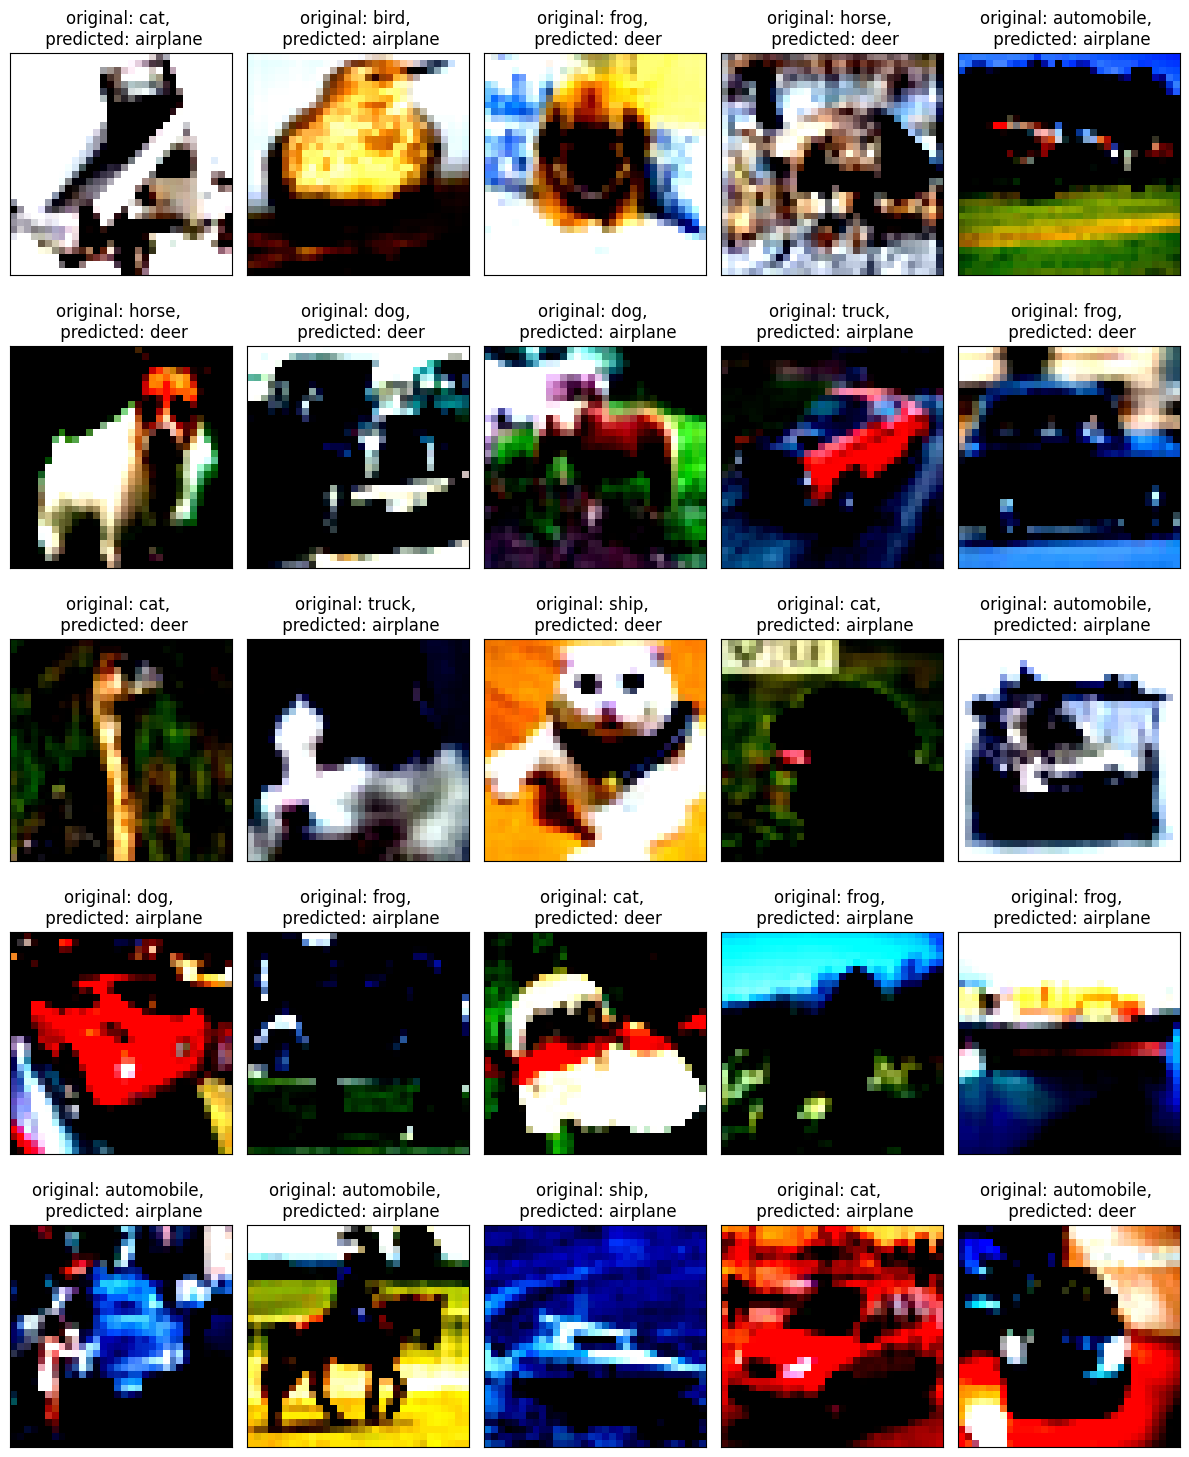

In [ ]:
from utils import SampleData
sample_data = SampleData()
sample_data.show_misclassified_images(train_test_obj.misclassified_images, train_test_obj.original_labels, train_test_obj.predicted_labels, train.classes)